PREDICTING DIAMOND PRICES WITH ML

In [121]:
import pandas as pd
import numpy as np

LOAD DATASET

In [122]:
df=pd.read_csv("D:\Data Science With Python\dataset\Linear dataset\diamonds.csv")


<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\dines\AppData\Local\Temp\ipykernel_14836\1102702819.py:1: SyntaxWarning: invalid escape sequence '\D'
  df=pd.read_csv("D:\Data Science With Python\dataset\Linear dataset\diamonds.csv")


In [123]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [124]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


FEATURE ENGINEERING

In [125]:
df.drop(columns='Unnamed: 0',inplace=True)

In [126]:
df.duplicated().sum()

np.int64(146)

In [127]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [128]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [129]:
df.dropna(inplace=True)
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [130]:
df.shape

(53794, 10)

In [131]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


PLOTS

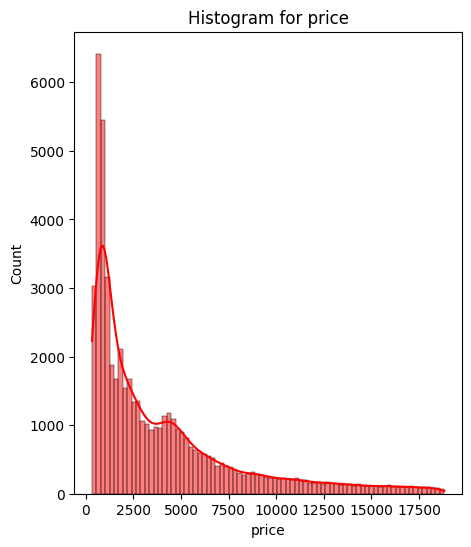

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,6))
sns.histplot(df['price'],kde=True,color='red')
plt.title('Histogram for price')
plt.show()
#This graph shows price is a normal distribution

In [134]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

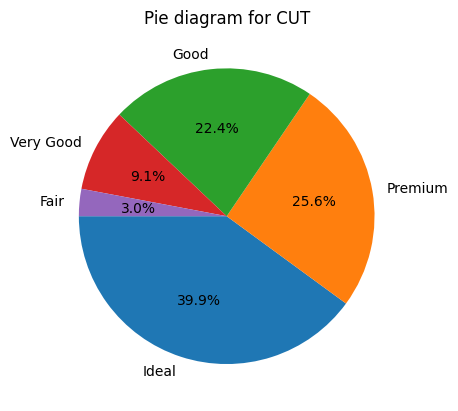

In [135]:
pie=df['cut'].value_counts()
plt.pie(pie,labels=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'],autopct='%1.1f%%',startangle=180)
plt.title('Pie diagram for CUT')
plt.show()
#This graph shows ideal is greater than comparitively others

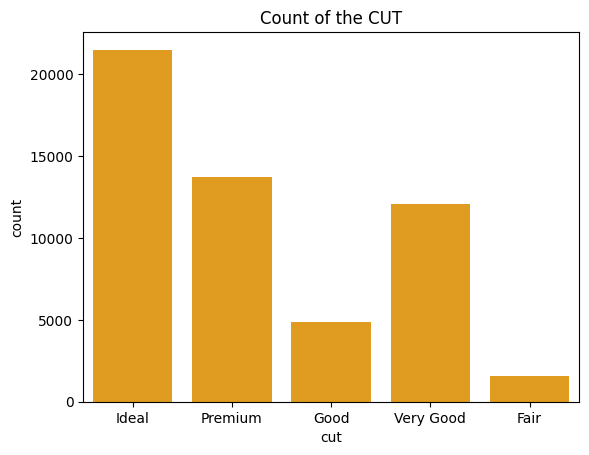

In [136]:
sns.countplot(data=df,x='cut',color='orange')
plt.title('Count of the CUT')
plt.show()
#This plot shows ideal count is higher comparatively others

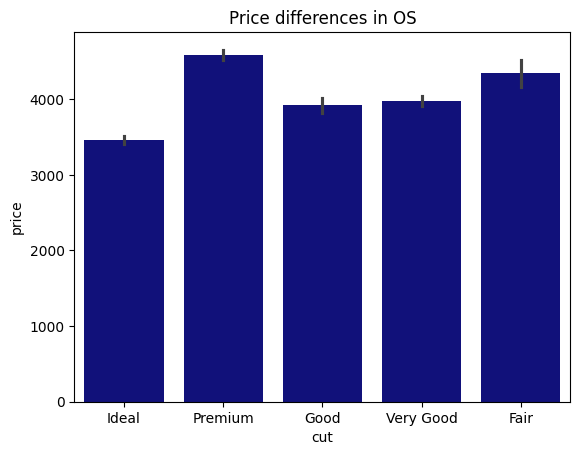

In [137]:
sns.barplot(data=df,x='cut',y='price',color='darkblue')
plt.title('Price differences in OS')
plt.show()
#This plot shows premium and fair price is more than FOUR THOUSAND

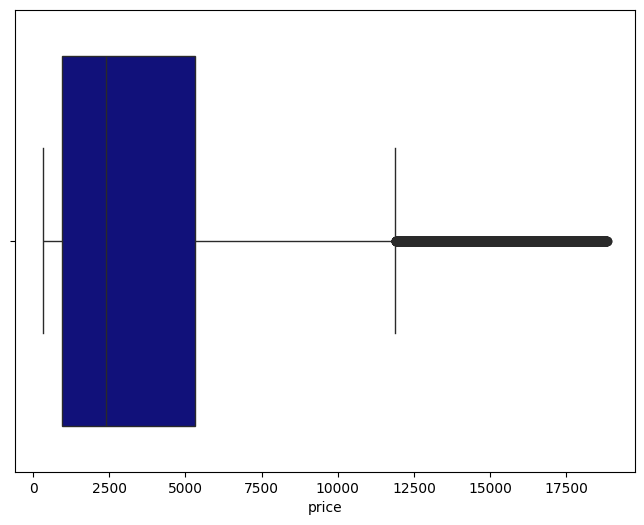

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'],color='darkblue')
plt.show()
#This plot shows outliers.But i can not remove outliers.
#I tried to remove outliers with IQR method .But It changes the nature of the dataset

In [139]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['cut']=le.fit_transform(df['cut'])
df['color']=le.fit_transform(df['color'])
df['clarity']=le.fit_transform(df['clarity'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  int64  
 2   color    53794 non-null  int64  
 3   clarity  53794 non-null  int64  
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.5 MB


FIT MODEL

In [140]:
x=df.drop(['price'],axis=1)
print(x)
y=df['price']
print(y)

       carat  cut  color  clarity  depth  table     x     y     z
0       0.23    2      1        3   61.5   55.0  3.95  3.98  2.43
1       0.21    3      1        2   59.8   61.0  3.89  3.84  2.31
2       0.23    1      1        4   56.9   65.0  4.05  4.07  2.31
3       0.29    3      5        5   62.4   58.0  4.20  4.23  2.63
4       0.31    1      6        3   63.3   58.0  4.34  4.35  2.75
...      ...  ...    ...      ...    ...    ...   ...   ...   ...
53935   0.72    2      0        2   60.8   57.0  5.75  5.76  3.50
53936   0.72    1      0        2   63.1   55.0  5.69  5.75  3.61
53937   0.70    4      0        2   62.8   60.0  5.66  5.68  3.56
53938   0.86    3      4        3   61.0   58.0  6.15  6.12  3.74
53939   0.75    2      0        3   62.2   55.0  5.83  5.87  3.64

[53794 rows x 9 columns]
0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53794, 

 USING STANDARDSCALER FOR NORMALISATION

In [141]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
r=st.fit_transform(x)

PREDICT MODEL

THIS IS FOR TRAIN

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))

[ 2151.15769528  4856.2049302   1905.0234259  ...  1104.46959287
 10940.96563887  1176.9292417 ]
0.8707201797433592
1722518.0183682253


THIS IS FOR TEST

In [143]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_test,y_test)
y_pred=model.predict(x_test)
print(y_pred)
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(y_pred,y_test))
print(mean_squared_error(y_pred,y_test))

[ 2037.1591702   4861.51947293  1924.28255998 ...  1147.50024782
 11138.88675371  1119.91069772]
0.8737025674964417
1709170.490050879


THIS IS A GENERALIZED FIT